## Logistic Regression on Titanic Dataset:
[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic)

### Objective:
1. Build a **logistic regression** model that predicts the classification - Survival or Deceased.
2. Model will be built using Scikit-learn library.

### Dataset: 
1. The dataset here is a processed version of the original kaggle dataset to keep things simple.

#### Code Flow:
1. Import all libraries.
2. Load data.
3. EDA.
4. Data cleaning.
5. Categorial features.
6. Logistic Regression Model.
7. Evaluation.

### 1. Import all libraries:

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Load data:

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. EDA:

Start by looking at the missing data.

#### 3.1 Missing Data:

We can plot a seaborn **heat map** of all the dataset and use isnull() function on the dataset to visualize if there is any missing data.

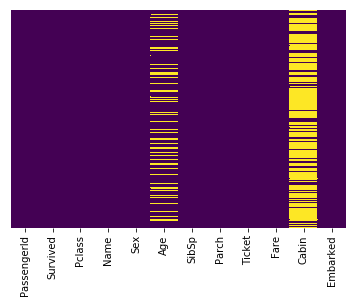

In [6]:
sns.heatmap(train.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')

As you can see the following features have some missing datapoints:
1. Age.
2. Cabin. 
<br>
Proportion of data missing from Age is much less compared to Cabin. 

#### 3.2 More EDA:
Lets look at people **survived** label based on ticket class to see if there is a trend there.

In [7]:
sns.set_style('whitegrid')

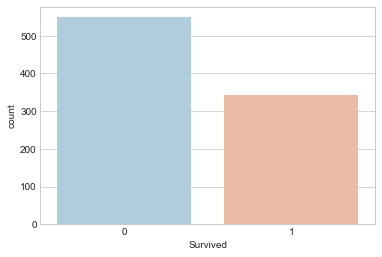

In [12]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

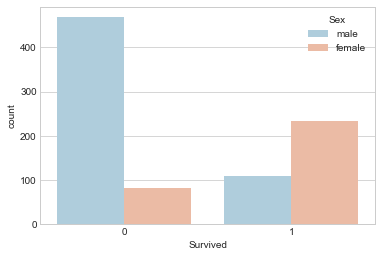

In [13]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

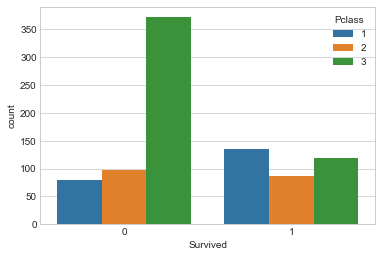

In [8]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = train)

Comments:
1. Survival to deceased ratio looks close.
2. Female gender has a better survival rate than male.
3. Even though there are more number of people in 3rd class ticket category, the number of people survived from 3rd class is similar to 1st class. Indicated 1st class had better chance at survival (by choice or coincident?).
4. Surival rate for the 2nd class ticket holders are similar for both class 0 & 1.

Let's look the distribution of the **age**.

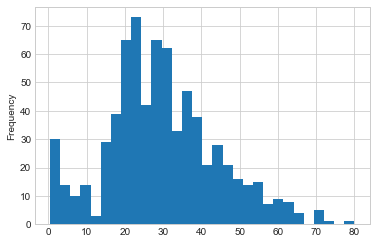

In [9]:
train['Age'].plot.hist(bins = 30)

Majority of the population are between the age 20-30.
Let's look at some stats on number of datapoints, datatype, features etc using pd.info() & pd.describe()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lets look at number of siblings/spouses on board & ticket fares. 

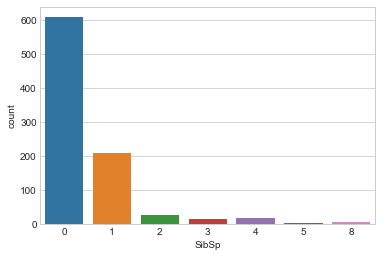

In [14]:
sns.countplot(x = 'SibSp',data = train)

Majority of the people who came on board were alone. Also the value '1' has more possiblity of being a spouse than sibling above a certain age group.

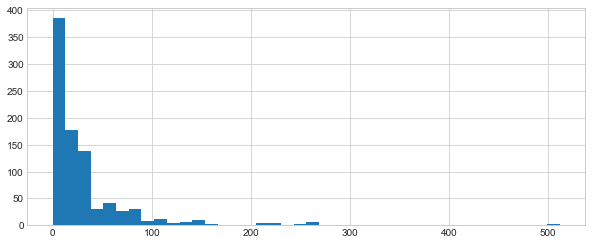

In [15]:
train['Fare'].hist(bins = 40, figsize = (10,4))

Majority of the ticket fares are between 0-50.<br>
### 4. Data Cleaning:
Since the proportion of data missing for age is less, it would be good idea to fill in those missing values. Easiest approach is to fill in with the mean values. A better appraoch based would be look at the age range for each ticket class.

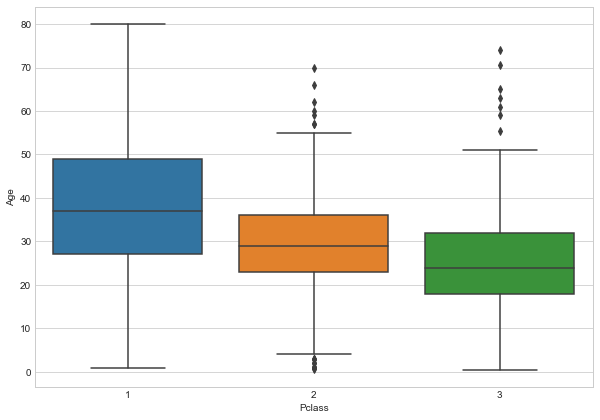

In [20]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age',data = train)

As expected the age is higher for 1st class compared to 3rd class. So instead of using overall mean we can use mean for each ticket class to populate the missing data.<br>
Lets define a function that does exactly that:

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): # See if the data is empty        
        if Pclass == 1:
            return 37 # average age for 1st class
        elif Pclass == 2:
            return 29 # average age for 2nd class
        else:
            return 24 # average age for 3rd class
    else: # pass through if it is not empty
        return Age

Apply this function on the age using the pandas.apply function.

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

Lets look at the heatmap again.

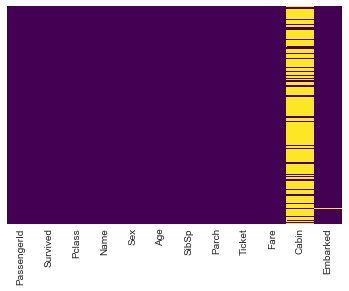

In [19]:
sns.heatmap(train.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')

Age feature is all populated. Since the cabin has lots of missing data points let's remove that feature to keep things simple.<br>
We can use pandas.drop() function to do that. 

In [20]:
train.drop('Cabin',axis = 1,inplace=True) #inplace set to true to ensure the 'drop' is permanent

Quickly check to enure that cabin is dropped.

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
train.dropna(inplace=True)

### 5. Categorical Features:

Looking at the table above we have few categorical features:
<br>
1. Sex.
2. Embarked.
3. Name.
4. Ticket.
5. Passenger Id.



We can drop Name & Ticket as those categories doesn't have any correlation to the output class. For the sex and embarked class we have convert them to dummy variables that the algorithm will be able to recognize. We can use pandas.get_dummies function to do that.

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
# drop_first is set to true to avoid dummy variable trap.

In [23]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
train = pd.concat([train,sex,embark],axis = 1) # concatenating all these dummy variable features.

In [25]:
train.head() # Check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
train.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis = 1) # Remove the original categorical features.

In [27]:
train.drop(['PassengerId'],axis = 1, inplace=True)

In [29]:
train.head() # Check

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### 6. Logistic Regression Model:

In [30]:
X = train.drop('Survived',axis = 1) # Drop survived output feature from the input dataframe.
y = train['Survived'] # Output class.

#### 6.1 Train Test Split:

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### 6.2 Logistic Regressor:

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

#### 6.3 Train the model:

In [49]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 6,4 Predictions:

In [50]:
predictions = logmodel.predict(X_test)

### 7. Evaluation:
We can look at classification report which contains precision & f1-score. We can also look at confuison matrix.

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
print(confusion_matrix(y_test,predictions))

[[133  21]
 [ 40  74]]


Decent score for a simplified study. To make this score better,
1. Look at the all the removed features and see if we can learn something.
2. Better way for missign age data.
3. Tune hyperparameters.
